In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisc','ibm','amzn']

In [4]:

stocks.head()

,aapl,cisc,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
stocks.pct_change(1).mean()

aapl    0.000750
cisc    0.000599
ibm     0.000081
amzn    0.001328
dtype: float64

In [6]:
stocks.pct_change(1).corr()

,aapl,cisc,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisc,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [8]:
stocks.pct_change(1).head()

,aapl,cisc,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [7]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisc,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


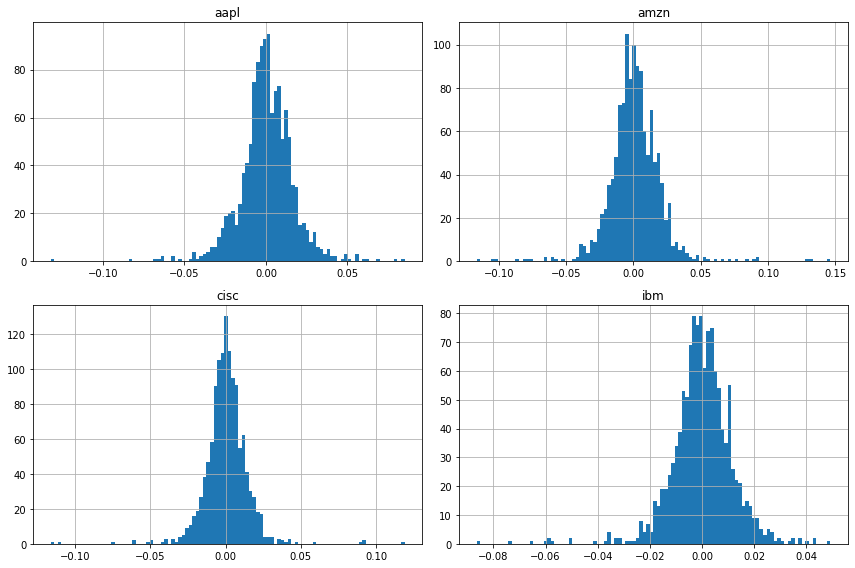

In [9]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [10]:
import seaborn as sns

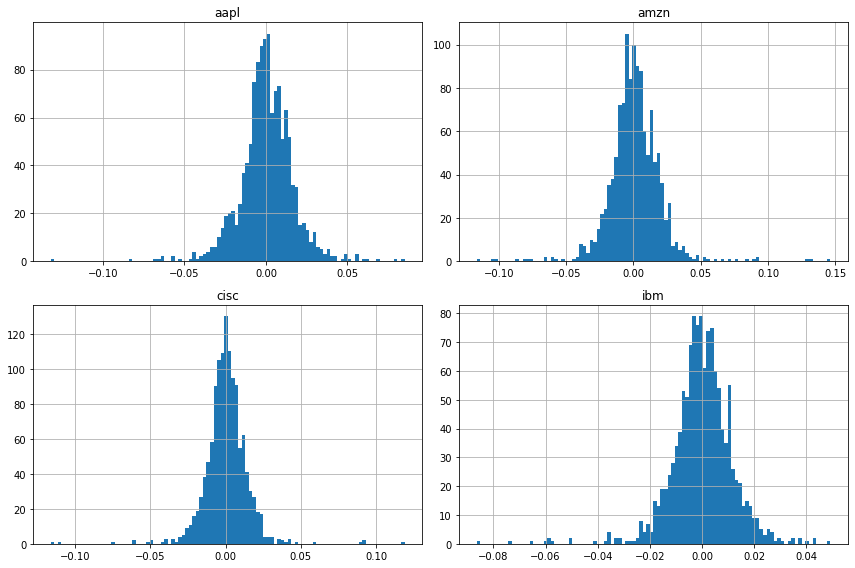

In [11]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [12]:
log_ret.mean()

aapl    0.000614
cisc    0.000497
ibm     0.000011
amzn    0.001139
dtype: float64

In [14]:
log_ret.corr()

,aapl,cisc,ibm,amzn
aapl,1.000000,0.301328,0.294922,0.236312
cisc,0.301328,1.000000,0.423915,0.286434
ibm,0.294922,0.423915,1.000000,0.259051
amzn,0.236312,0.286434,0.259051,1.000000


In [15]:
log_ret.cov()

,aapl,cisc,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisc,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [16]:
log_ret.cov() * 252

,aapl,cisc,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisc,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [32]:
np.random.seed(101)

print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random Weights: ')
print(weights)

print('Re-balance')
weights /= np.sum(weights)   # a normalisation technique of sorts
print(weights)

#Expected Return
print('Expected Portfolio Return: ')
exp_ret = np.sum((log_ret.mean()*weights) *252)   #ANN PORT RETURN
print(exp_ret)

#EXPECTED VOLATILITY
print('Expected Volatility: ')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252, weights)))

# Sharpe Ratio

print('Sharpe Ratio:')
SR = exp_ret/exp_vol
print(SR)

Index(['aapl', 'cisc', 'ibm', 'amzn'], dtype='object')
Random Weights: 
[0.51639863 0.57066759 0.02847423 0.17152166]
Re-balance
[0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return: 
0.15599272049632004
Expected Volatility: 
Sharpe Ratio:
0.8430831483926032


In [33]:
weights.sum()

1.0000000000000002

In [30]:
exp_vol

0.18502649565909488

###  part two

In [43]:
np.random.seed(101)

num_ports = 100000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)


for ind in range(num_ports):
    
    #weights
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)   # a normalisation technique of sorts
    
    #save the weights
    all_weights[ind,:] = weights
    
    #Expected Return
    ret_arr[ind] = np.sum((log_ret.mean()*weights) *252)   #ANN PORT RETURN


    #EXPECTED VOLATILITY
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]


In [44]:
sharpe_arr.max()

1.0303260551271065

In [45]:
sharpe_arr.argmax() #returns the index location of the maximum value

1420

In [46]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [48]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

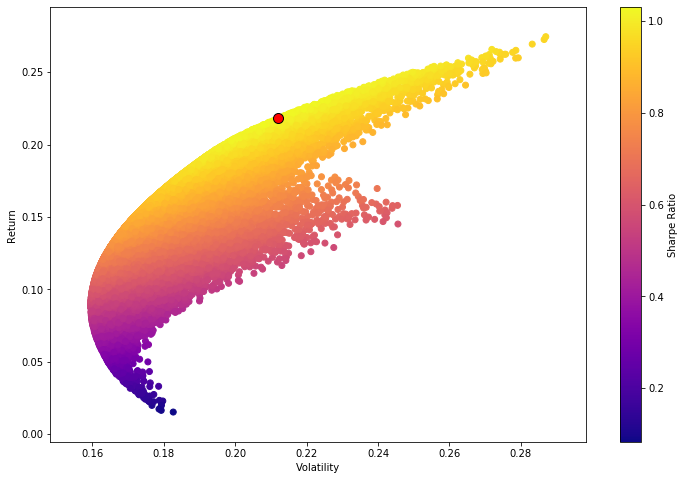

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')

plt.show();

###  Portfolio Optimization, scipy!!

In [51]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [52]:
from scipy.optimize import minimize

In [53]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [54]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [55]:

def check_sum(weights):
    #return 0 if the sum of the weights is 1
    return np.sum(weights) - 1

In [56]:
cons = ({'type': 'eq','fun':check_sum})

In [57]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [58]:
init_guess = [0.25,0.25,0.25,0.25]

In [59]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [60]:
opt_results

     fun: -1.0307168703356437
     jac: array([ 5.64306974e-05,  4.18275595e-05,  3.39921713e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289773e-01, 2.04189816e-01, 5.44676066e-17, 5.29520411e-01])

In [62]:
opt_results.x

array([2.66289773e-01, 2.04189816e-01, 5.44676066e-17, 5.29520411e-01])

In [63]:
get_ret_vol_sr(opt_results.x)

array([0.21885916, 0.21233683, 1.03071687])

In [64]:
# for larger portfolios

###  The efficient Froniter

In [65]:
frontier_y = np.linspace(0,0.3,100)

In [66]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [70]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    
    result = minimize(minimize_vol,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

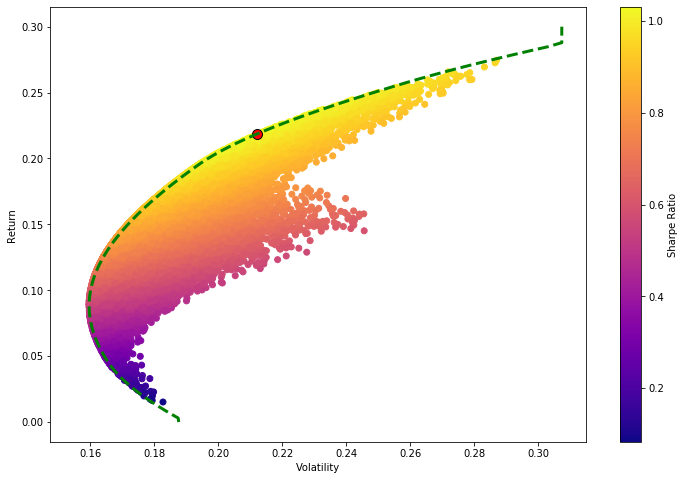

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)

plt.show();